In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OneHotEncoder
#from skimage.feature import greycomatrix,greycoprops
import keras

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
data_path = r'C:\Users\mmatr\Desktop\Learning Data Science\IBM Machine Learning\Git\IBM-Machine-Learning-Course\Course_5_Deep_Learning\NEU Metal Surface Defects Data'
os.chdir(data_path)


In [3]:
def mse(a,b):
    """function to compute the mean square error between two numpy arrays"""
    return np.square(a-b).mean()

def load_images(data_path):
    """Function to load images from NEU Dataset"""

    images=[] 
    labels=[] 

    for dirpath, dirnames, filenames in os.walk(data_path):
        for filename in filenames:
            defect=dirpath.split('\\')[-1] 
            if '.bmp' in filename:
                images.append(cv2.imread(os.path.join(dirpath,filename),0))
                labels.append(defect)

    images=np.asarray(images)
    labels=np.asarray(labels)

    return images, labels

In [4]:
#load the data.
data, labels = load_images(data_path)

# train_images, train_labels = load_images(data_path + r'\train')
# val_images, val_labels = load_images(data_path + r'\valid')
# test_images, test_labels = load_images(data_path + r'\test')

In [5]:
#this is necessary to get the data into the form that to_categorical requires, namely an array of numeric labels
le = LabelEncoder()

labels_ohe = keras.utils.to_categorical(le.fit_transform(labels).reshape(-1,1), 6)

In [6]:
data=data/255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.15)

In [8]:
X_train = X_train.reshape(len(X_train),200,200,1)
X_test = X_test.reshape(len(X_test),200,200,1)

The following cell uses a train test split so that the predictor has new data to be tested against

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    #rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [11]:
train_datagen.flow(X_train*255,y_train,batch_size=1)

In [12]:
test=[]
for i, v in enumerate(train_datagen.flow(X_train,y_train)):
    if i<5:
        test.append(v)
    else:
        break

In [13]:
sample=test[0][0][2].reshape(200,200)

In [14]:
#code to acquaint with cv2. from tutorial on geeksforgeeks

# path
#path = data_path + r'\test\Crazing\Cr_1.bmp'
  
# Reading an image in grayscale mode
#image = cv2.imread(sample.astype(int), 0)
  
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method
# Displaying the image
cv2.imshow(window_name, sample)
  
# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()

In [15]:
#code to acquaint with cv2. from tutorial on geeksforgeeks

# path
path = data_path + r'\test\Crazing\Cr_1.bmp'
  
# Reading an image in grayscale mode
image = cv2.imread(path, 0)
  
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method
# Displaying the image
cv2.imshow(window_name, image)
  
# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()

# Kaggle Solution Step Through

The follow code was taknen from Kaggle.  Used as an example of how to tweak the neural net to get a feel for the impacts of each layer.

In [16]:
model = Sequential([
    Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (2,2), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [18]:
history = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 658
Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 38s 25ms/step - loss: 2.0362 - accuracy: 0.2856 - val_loss: 1.4018 - val_accuracy: 0.4333
Epoch 2/10
1530/1530 [==============================] - 47s 31ms/step - loss: 1.3437 - accuracy: 0.4856 - val_loss: 1.2216 - val_accuracy: 0.5889
Epoch 3/10
1530/1530 [==============================] - 53s 35ms/step - loss: 1.0950 - accuracy: 0.6072 - val_loss: 1.1564 - val_accuracy: 0.5519
Epoch 4/10
1530/1530 [==============================] - 47s 31ms/step - loss: 0.8028 - accuracy: 0.7111 - val_loss: 0.7628 - val_accuracy: 0.7593
Epoch 5/10
1530/1530 [==============================] - 47s 31ms/step - loss: 0.6982 - accuracy: 0.7634 - val_loss: 0.4320 - val_accuracy: 0.8222
Epoch 6/10
1530/1530 [==============================] - 46s 30ms/step - loss: 0.6495 - accuracy: 0.7895 - val_loss: 0.4703 - va

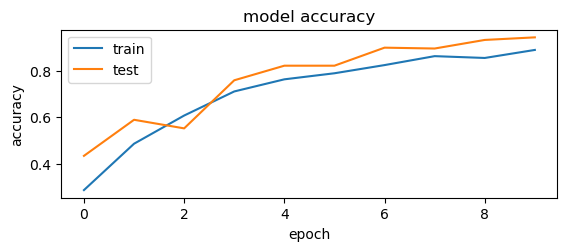

In [19]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
# plt.subplot(212)  
# plt.plot(history.history['loss'])  
# plt.plot(history.history['val_loss'])  
# plt.title('model loss')  
# plt.ylabel('loss')  
# plt.xlabel('epoch')  
# plt.legend(['train', 'test'], loc='upper left')  
# plt.show()